# Dataset analysis

In [20]:
import pandas as pd 

In [21]:
df=pd.read_csv(r'D:\med-image-captioning\data\csv\dataset_clean.csv',encoding='utf-8')

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217060 entries, 0 to 217059
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  217060 non-null  object
 1   caption   217060 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB
None


In [23]:
# Function to calculate the number of words in a sentence
def sentence_length(sentence):
    return len(sentence.split())

# Apply the function to each sentence in the DataFrame
# Assuming each row is a single sentence for simplicity
df['sentence_length'] = df['caption'].apply(sentence_length)

# Generate descriptive statistics for sentence lengths
sentence_length_stats = df['sentence_length'].describe()

print(sentence_length_stats)

count    217060.000000
mean         52.631355
std          43.630244
min           1.000000
25%          22.000000
50%          41.000000
75%          70.000000
max         819.000000
Name: sentence_length, dtype: float64


In [24]:
import matplotlib.pyplot as plt

In [25]:
# Calculate the number of words in each sentence
df['sentence_length'] = df['caption'].apply(lambda x: len(x.split()))

# Group sentences by their length in tens
df['length_group'] = df['sentence_length'] // 10 * 10

# Count the number of sentences in each group
group_counts = df.groupby('length_group')['caption'].count()



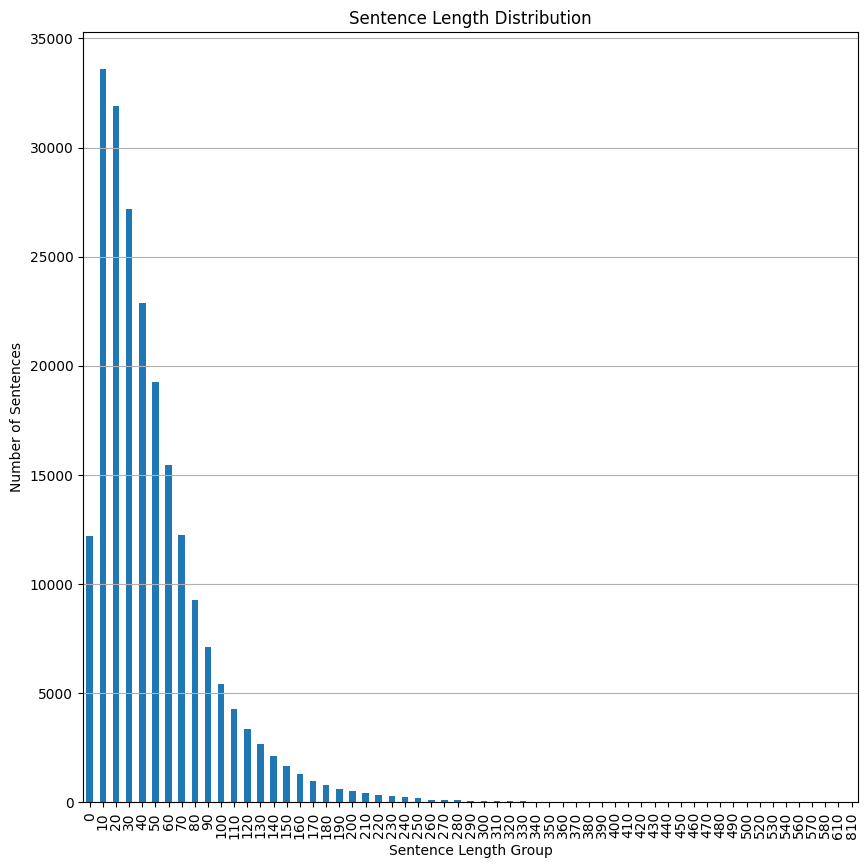

In [26]:
# Plotting
plt.figure(figsize=(10, 10))
group_counts.plot(kind='bar')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length Group')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Show the plot
plt.show()

In [27]:
print(df.head())

                                            image_id  \
0  26491ab76c6e8d6acc582e71bb6b3b5f5601ccc2_3-Fig...   
1  57c9ad0f4aab133f96d40992c46926fabc901ffa_2-Fig...   
2  57c9ad0f4aab133f96d40992c46926fabc901ffa_2-Fig...   
3  57c9ad0f4aab133f96d40992c46926fabc901ffa_2-Fig...   
4  57c9ad0f4aab133f96d40992c46926fabc901ffa_2-Fig...   

                                             caption  sentence_length  \
0  nuclear magnetic resonance scan demonstrating ...               15   
1  barium enema and endoscopic image of the high ...               16   
2  surveillance colonoscopy year after sems place...               23   
3  complete resolution of the colonic obstruction...               19   
4  endoscopic images years after colonic sems pla...               43   

   length_group  
0            10  
1            10  
2            20  
3            10  
4            40  


In [28]:
# Calculate the number of words in each sentence
df['sentence_length'] = df['caption'].apply(lambda x: len(x.split()))

# Filter out rows where the sentence length is greater than 100
df = df[df['sentence_length'] < 100]

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 191137 entries, 0 to 217056
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   image_id         191137 non-null  object
 1   caption          191137 non-null  object
 2   sentence_length  191137 non-null  int64 
 3   length_group     191137 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.3+ MB
None


In [30]:
# Count the number of sentences in each group
group_counts = df.groupby('length_group')['caption'].count()


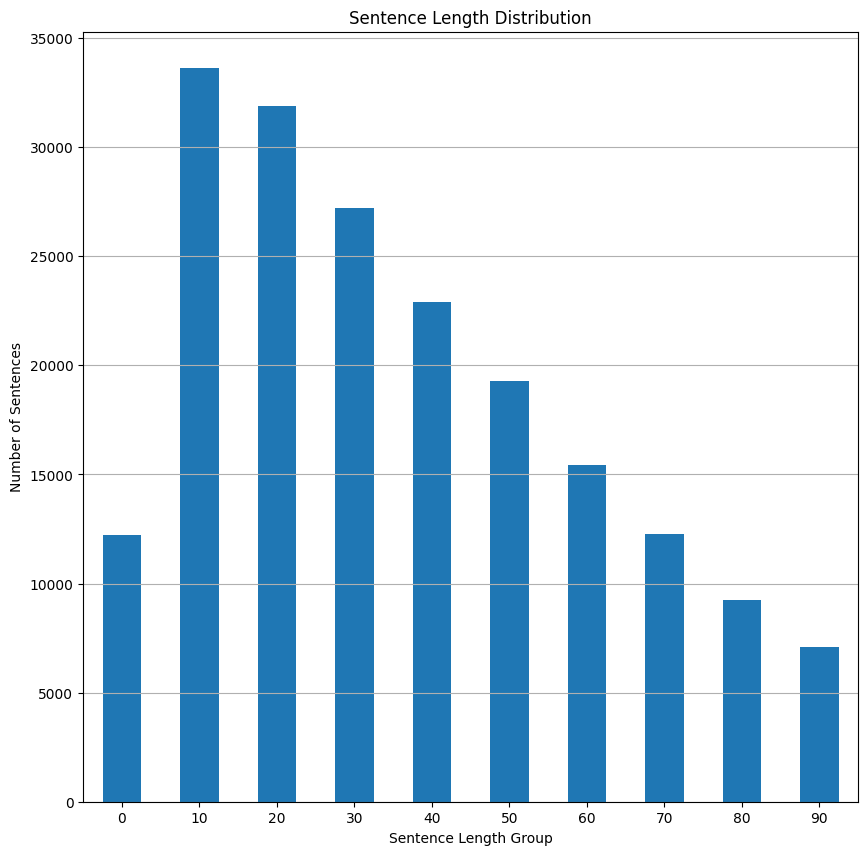

In [31]:
# Plotting
plt.figure(figsize=(10, 10))
group_counts.plot(kind='bar')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length Group')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 191137 entries, 0 to 217056
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   image_id         191137 non-null  object
 1   caption          191137 non-null  object
 2   sentence_length  191137 non-null  int64 
 3   length_group     191137 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.3+ MB
None


In [33]:
# Calculate the number of words in each sentence
df['sentence_length'] = df['caption'].apply(lambda x: len(x.split()))

# Filter out rows where the sentence length is greater than 20
df = df[df['sentence_length'] <= 20]

In [34]:
# Count the number of sentences in each group
group_counts = df.groupby('length_group')['caption'].count()


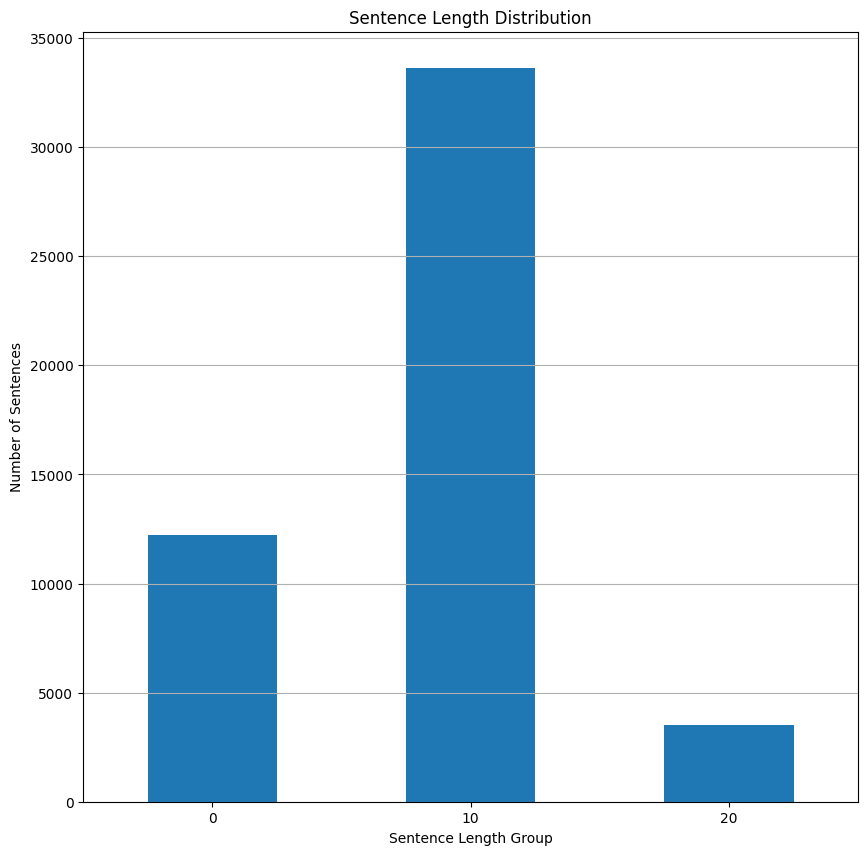

In [35]:
# Plotting
plt.figure(figsize=(10, 10))
group_counts.plot(kind='bar')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length Group')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49325 entries, 0 to 217052
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_id         49325 non-null  object
 1   caption          49325 non-null  object
 2   sentence_length  49325 non-null  int64 
 3   length_group     49325 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB
None


In [37]:
df=df.drop(columns=['sentence_length'])
df=df.drop(columns=['length_group'])

In [38]:
df.to_csv(r'D:\med-image-captioning\data\csv\dataset_20.csv',encoding='utf-8')